In [1]:
import os
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import tensorflow_datasets as tfds

C:\Users\Game On Dp\.conda\envs\Keras\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
batch_size = 32
img_height = 180
img_width = 180
data_dir = "D:\Cars"

In [3]:
train_ds = tf.keras.utils.image_dataset_from_directory(
          data_dir,
          validation_split=0.2,
          subset="training",
          seed=123,
          image_size=(img_height, img_width),
          batch_size=batch_size)

Found 16185 files belonging to 2 classes.
Using 12948 files for training.


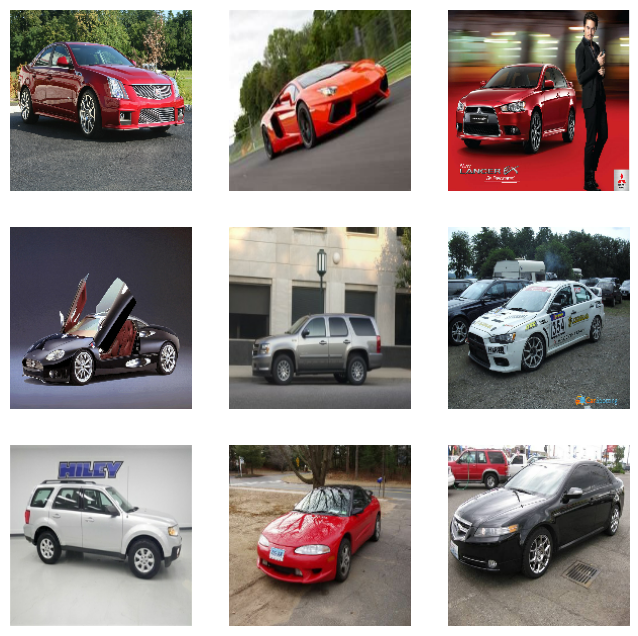

In [19]:
plt.figure(figsize=(8, 8))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.axis("off")

In [8]:
def vizualizate(original, augmented):
    fig = plt.figure()
    plt.subplot(1, 2, 1)
    plt.title('Original')
    plt.imshow(original)
    plt.axis('off')
    plt.subplot(1, 2, 2)
    plt.title('Augmented')
    plt.imshow(augmented)
    plt.axis('off')

In [11]:
original_img = images[0].numpy().astype("uint8")

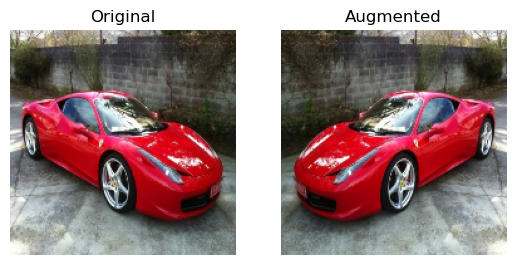

In [12]:
flipped = tf.image.flip_left_right(original_img)
vizualizate(original_img, flipped)

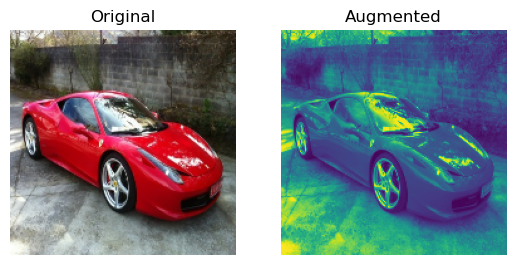

In [16]:
gray_scale = tf.image.rgb_to_grayscale(original_img)
vizualizate(original_img, gray_scale)

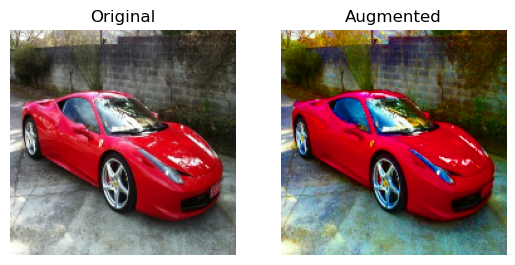

In [24]:
gray_scale = tf.image.adjust_saturation(original_img, 4)
vizualizate(original_img, gray_scale)

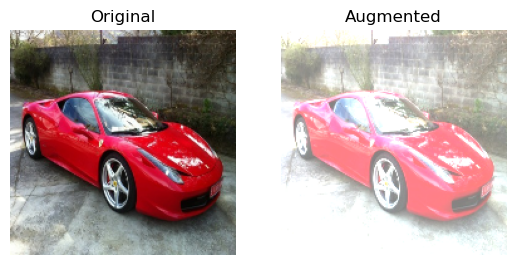

In [25]:
gray_scale = tf.image.adjust_brightness(original_img, 0.5)
vizualizate(original_img, gray_scale)

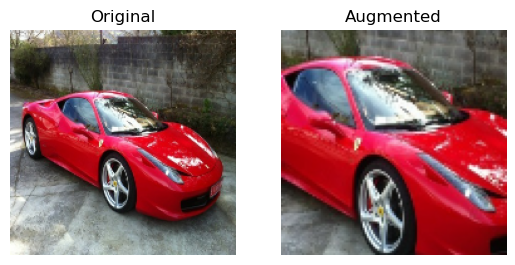

In [28]:
gray_scale = tf.image.central_crop(original_img, 0.6)
vizualizate(original_img, gray_scale)

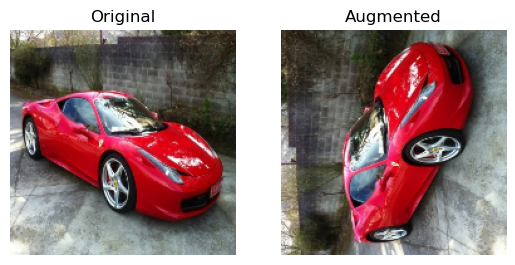

In [29]:
gray_scale = tf.image.rot90(original_img)
vizualizate(original_img, gray_scale)

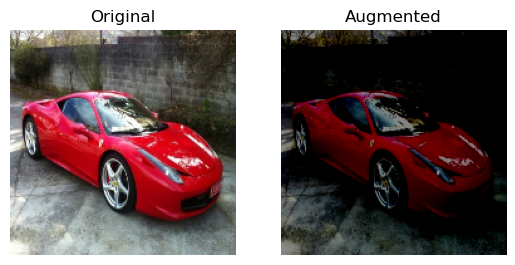

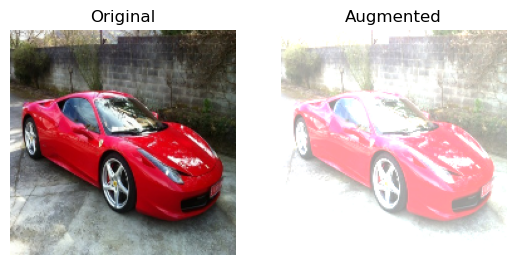

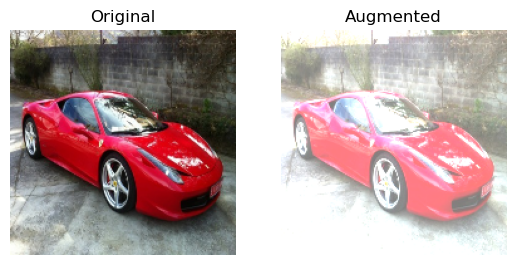

In [33]:
for i in range (3):
    seed = (i, 0)
    st_rand_bright = tf.image.stateless_random_brightness(original_img, max_delta=0.8, seed=seed)
    vizualizate(original_img, st_rand_bright)